In [ ]:
#imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import itertools
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
data = pd.read_csv(r'export_dataframe.csv')
data.head()

,text,classe
0,"['washington', 'reuters', 'head', 'conservativ...",1
1,"['washington', 'reuters', 'transgender', 'peop...",1
2,"['washington', 'reuters', 'special', 'counsel'...",1
3,"['washington', 'reuters', 'trump', 'campaign',...",1
4,"['seattle', 'washington', 'reuters', 'presiden...",1


In [ ]:
import re
def join_text(text):
    text = text.split()
    l_text = [re.sub(r'\W', '', i) for i in text]
    return ' '.join(l_text)

In [ ]:
l = []
for i in range(len(data['text'])):
    l.append(join_text(data['text'][i]))


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=2000)
X = vectorizer.fit_transform(l).toarray()
len(X)

38647

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['classe'].values, test_size=0.2, random_state=80)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
classifier.score(X_test, y_test)

0.9968952134540751

In [ ]:
prediction = classifier.predict(X_test)
print(prediction)
print(y_test)

[1 1 1 ... 0 0 1]
[1 1 1 ... 0 0 1]


In [ ]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

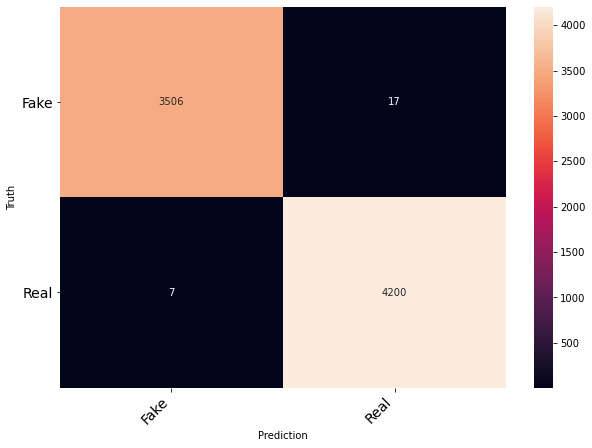

In [ ]:
cm1 = confusion_matrix(y_test, prediction)
print_confusion_matrix(cm1 ,["Fake", "Real"])

In [ ]:
report_test1 = classification_report(y_test, prediction)
print(report_test1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3523
           1       1.00      1.00      1.00      4207

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9930142302716688

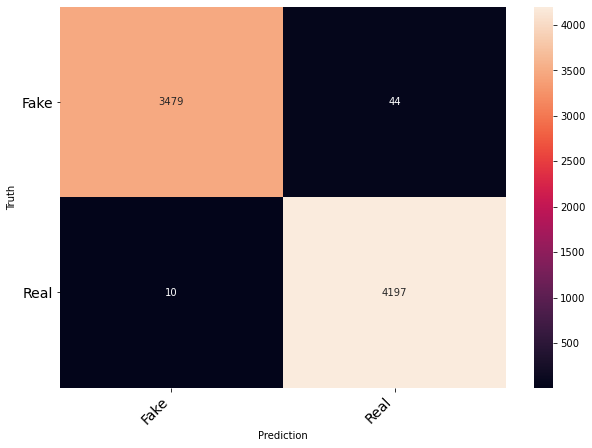

In [ ]:
prediction2 = clf.predict(X_test)
cm2 = confusion_matrix(y_test, prediction2)
print_confusion_matrix(cm2 ,["Fake", "Real"])

In [ ]:
report_test2 = classification_report(y_test, prediction2)
print(report_test2)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3523
           1       0.99      1.00      0.99      4207

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



In [ ]:
from keras import layers
from keras import models
model=models.Sequential()

Using TensorFlow backend.


In [ ]:
model.add(layers.Dense(80, input_dim = X_train.shape[1], activation = 'relu'))
model.add(layers.Dense(80, activation = 'relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                160080    
_________________________________________________________________
dense_2 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 81        
Total params: 166,641
Trainable params: 166,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train[:25000], y_train[:25000], validation_data=(X_train[25000:], y_train[25000:]), epochs = 15)

Train on 25000 samples, validate on 5917 samples
Epoch 1/15
25000/25000 [==============================] - 2s 91us/step - loss: 0.0959 - accuracy: 0.9630 - val_loss: 0.0488 - val_accuracy: 0.9843
Epoch 2/15
25000/25000 [==============================] - 2s 86us/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0550 - val_accuracy: 0.9845
Epoch 3/15
25000/25000 [==============================] - 2s 93us/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0514 - val_accuracy: 0.9841
Epoch 4/15
25000/25000 [==============================] - 2s 96us/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.0546 - val_accuracy: 0.9858
Epoch 5/15
25000/25000 [==============================] - 2s 92us/step - loss: 0.0060 - accuracy: 0.9978 - val_loss: 0.0607 - val_accuracy: 0.9858
Epoch 6/15
25000/25000 [==============================] - 2s 85us/step - loss: 0.0071 - accuracy: 0.9972 - val_loss: 0.0642 - val_accuracy: 0.9866
Epoch 7/15
25000/25000 [==============================] - 2s 79us/ste

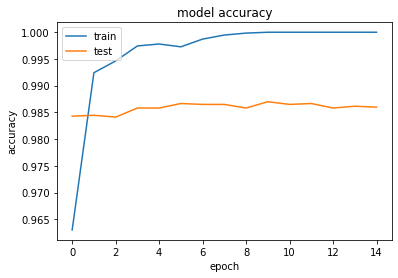

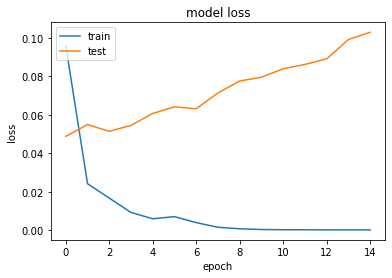

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test accuarcy: %0.2f%%' % (score[1] * 100))

7730/7730 [==============================] - 0s 33us/step
Test accuarcy: 98.77%


In [ ]:
prediction3 = model.predict(X_test)
for i in range (prediction3.shape[0]) : 
    prediction3[i] = int(prediction3[i])

print(prediction3)

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]


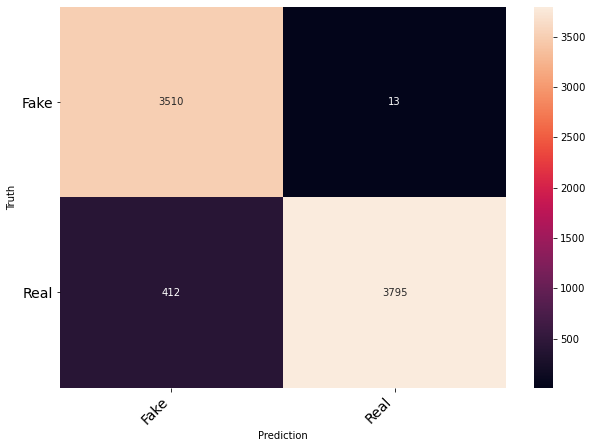

In [ ]:
cm3 = confusion_matrix(y_test, prediction3)
print_confusion_matrix(cm3 ,["Fake", "Real"])

In [ ]:
report_test3 = classification_report(y_test, prediction3)
print(report_test3)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3523
           1       1.00      0.90      0.95      4207

    accuracy                           0.95      7730
   macro avg       0.95      0.95      0.94      7730
weighted avg       0.95      0.95      0.95      7730

